In [11]:
from data.dataset import Dataset
import warnings
import os
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy
from scipy import stats
import numpy as np
import seaborn as sns
import itertools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio

In [2]:
data_ = Dataset()
dataset = data_.prepare()

READING DATASET
PREPARING DATASET
	 cleaned null values...
	 extracted datetime variables...
	 cleaned outliers...
	 generated features...
Dataset size: (4860958, 18)
Elapsed time: 68.76608276367188


In [3]:
dataset.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,month_name,month_year,week_day,day,hour,log_fare_amount,trip_distance_km,log_trip_distance
0,2015-06-30 23:59:03.0000004,11.0,2015-06-30 23:59:03,-73.969475,40.750282,-73.993965,40.751568,1,2015,6,Jun,2015 - Jun,Tuesday,30,23,2.397895,2.068571,0.726858
1,2015-06-30 23:56:50.0000001,14.5,2015-06-30 23:56:50,-73.992104,40.734531,-73.960335,40.775703,1,2015,6,Jun,2015 - Jun,Tuesday,30,23,2.674149,5.304466,1.668549
2,2015-06-30 23:56:00.0000001,20.0,2015-06-30 23:56:00,-73.970154,40.757011,-73.962608,40.708641,1,2015,6,Jun,2015 - Jun,Tuesday,30,23,2.995732,5.417685,1.689669
3,2015-06-30 23:55:51.0000007,6.5,2015-06-30 23:55:51,-74.010147,40.720520,-74.000557,40.727139,1,2015,6,Jun,2015 - Jun,Tuesday,30,23,1.871802,1.093388,0.089281
4,2015-06-30 23:53:49.0000003,7.5,2015-06-30 23:53:49,-73.959969,40.762405,-73.953064,40.782688,1,2015,6,Jun,2015 - Jun,Tuesday,30,23,2.014903,2.329810,0.845787


p = 0
The null hypothesis can be rejected


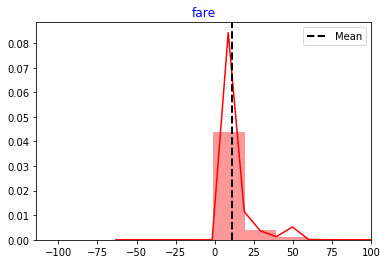

In [24]:
#Hypothesis Testing
#H0 = The fare amount is a Gaussian distribution.
#H1 = The fare amount does not have a Gaussian distribution.

fare_amount = dataset["fare_amount"]
stat, p = stats.normaltest(fare_amount)

alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a Gaussian Distribution distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
sns.distplot(dataset['fare_amount'],color = 'red')
plt.axvline(dataset["fare_amount"].mean(),linewidth  = 2 ,
                linestyle = "dashed",color = "k" ,
                label = "Mean")
plt.xlim(right = 100)
plt.legend(loc = "best")
plt.title("fare",color = "b")
plt.xlabel("")
plt.savefig("Fair_amount.png")

#The null hypothesis: The distribution is Gaussian is rejected;
#As we can see that the distribution is not a Gaussian by plotting it
    

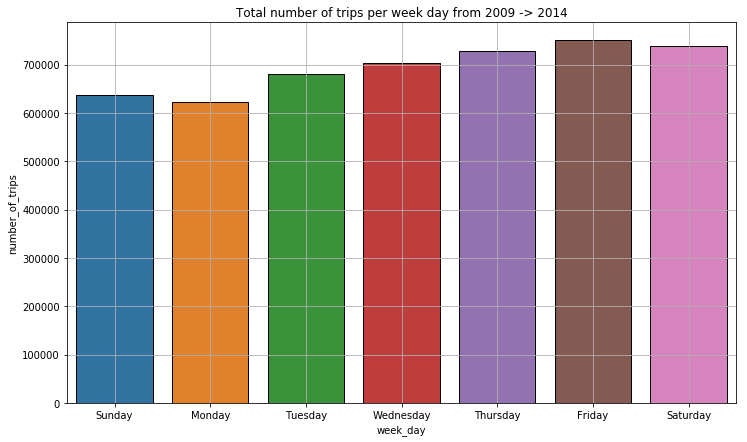

In [25]:
day_count = dataset["week_day"].value_counts().reset_index()
day_count.columns = ["week_day","number_of_trips"]
day_count["order"]  = day_count["week_day"].replace({"Sunday" :1,'Monday' : 2, 'Tuesday': 3,
                                                    'Wednesday':4,'Thursday' :5, 'Friday':6,
                                                    'Saturday':7})
day_count = day_count.sort_values(by = "order",ascending  = True)

plt.figure(figsize = (12,7))
sns.barplot("week_day","number_of_trips",
             data = day_count,order = day_count['week_day'],
             linewidth =1,edgecolor = "k"*len(day_count['order'])
            )
plt.grid(True)
plt.title("Total number of trips per week day from 2009 -> 2014")
plt.savefig("Total_trips.png")
plt.show()


# The plot suggests that people tend to go outand use taxi more on toward 
# the weekend starting from Friday(highest number) and ended on Sunday
# Monday has the lowest number of trips and Friday has the highest


In [14]:
avg_fare_hr = dataset.groupby("hour")["fare_amount"].mean().reset_index()
avg_fare_hr
trace = go.Scatter(x = avg_fare_hr["hour"],y = avg_fare_hr["fare_amount"],
                   mode = "markers",
                  marker = dict(color = "red",size = 10,
                                line = dict(color = "black",width =2)))

#layout
layout = go.Layout(dict(title = "Average fare by hour",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "hour",
                                     zerolinewidth=1, ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "average_fare",
                                     zerolinewidth=1, ticklen=5,gridwidth=2),
                       )
                  )

fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)
pio.write_image(fig, "Average_fare.png")
#Another interesting information that we extracted from the data visualization is that people in New York use Taxi the
#most in the early morning. The information suggest that people in New York tend to wake up early and use taxi 
#to go to work. 

In [8]:

trip_count = dataset.groupby(["year","month",
                               "month_name"])["month_year"].value_counts().to_frame()
trip_count.columns = ["count"]
trip_count = trip_count.reset_index()

passenger_count = (dataset.groupby(["year","month","month_name",
                                     "month_year"])["passenger_count"].sum().reset_index())

total_fare = (dataset.groupby(["year","month","month_name",
                                     "month_year"])["fare_amount"].sum().reset_index())

total_trip_dist = (dataset.groupby(["year","month","month_name",
                                     "month_year"])["trip_distance_km"].sum().reset_index())

In [13]:
merge1  = trip_count.merge(passenger_count,left_on = "month_year",
                           right_on = "month_year",how= "left")

merge2  = total_fare.merge(total_trip_dist,left_on = "month_year",
                           right_on = "month_year",how= "left")

final_my_dat = merge1.merge(merge2,left_on = "month_year",
                           right_on = "month_year",how= "left")

final_my_dat = final_my_dat[["month_year","count","passenger_count","fare_amount",
                             "trip_distance_km","month_x_x","year_x_x","month_name_x_x"]]


final_my_dat = final_my_dat.rename(columns = {"month_x_x":"month","year_x_x":"year",
                                   "count" : "trips_count","month_name_x_x":"month_name"})
corr  =  np.array(final_my_dat[['trips_count', 'passenger_count',
                                'fare_amount', "trip_distance_km"]].corr())
corr  =  np.around(corr,4)

# #x & y ticks
ticks =  ['trips_count', 'passenger_count', 'fare_amount', "trip_distance_km"]

# #plot heatmap
fig = ff.create_annotated_heatmap(z = corr,x = ticks,y = ticks,showscale=True,
                                   #colorscale = "Portland",
                                   colorscale='Electric',
                                   colorbar   = dict(title = "correlation coefficient",
                                                     titleside = "right"
                                      ) 
                                  )
fig.layout.title  = "Correlation Matrix"
fig.layout.margin = dict(l = 200,r = 200)
py.iplot(fig)
if not os.path.exists('images'):
    os.mkdir('images')
pio.write_image(fig, "Correlation.png")

#We can then evaluate the correlation between each feature and also each feature the fare amount. As you can see 
#in Figure 1, the fare amount is not really correlated with any feature as it's effect by a combination of different 
#features such as distance, passenger count, though the trip distance show a correlation of 0.6529 with the fare amount. Interestingly, the passenger count and fare amount is highly correlated (0.8765). That maybe because people tend to use taxi for a long trip when they share ride. 
#Passenger count and trips count share a similar behavior.